In [ ]:
import requests
import pandas as pd
import time

# URL de base de l'API Jikan
base_url = "https://api.jikan.moe/v4/anime/"

# Fonction pour récupérer les informations sur un anime spécifique
def get_anime_info(anime_id):
    try:
        response = requests.get(f"{base_url}{anime_id}/full")
        if response.status_code == 200:
            return response.json()['data']
        else:
            print(f"Erreur lors de la récupération de l'anime {anime_id}: {response.status_code}")
            return None
    except Exception as e:
        print(f"Erreur lors de la récupération de l'anime {anime_id}: {str(e)}")
        return None

# Liste pour stocker les données des animes
all_animes = []

# Itérer à travers les IDs d'animes (ex: de 1 à 1000)
for anime_id in range(1, 10000):
    anime_data = get_anime_info(anime_id)
    if anime_data:
        all_animes.append(anime_data)
        print(f"Récupération des informations de l'anime {anime_id}")
    
    # Pause de 2 secondes entre les requêtes pour éviter l'erreur 429
    time.sleep(2)

# Convertir la liste de dictionnaires en un DataFrame
animes_df = pd.DataFrame(all_animes)

# Enregistrer les données dans un fichier CSV
csv_filename = "animes.csv"
animes_df.to_csv(csv_filename, index=False, encoding="utf-8")

print(f"Collecte de données terminée. Les informations ont été enregistrées dans {csv_filename}.")


In [ ]:
import pandas as pd
import ast
import json

# fichier CSV original
file_path = 'data/animes.csv'

# Charger les données à partir du fichier CSV
anime_data = pd.read_csv(file_path)

# Définir une fonction pour traiter les colonnes qui contiennent des listes d'objets
def process_list_like_column(column_data):
    if isinstance(column_data, str) and (column_data == '[]' or column_data.strip() == ''):
        return ['Inconnu']
    elif isinstance(column_data, str):
        try:
            list_data = ast.literal_eval(column_data)
            return [item['name'] for item in list_data]
        except (ValueError, SyntaxError):
            return ['Inconnu']
    else:
        return ['Inconnu']

# Liste des colonnes à traiter comme des listes d'objets avec 'name'
columns_to_process = ['producers', 'studios', 'genres', 'explicit_genres', 'themes']

# Appliquer la fonction à chaque colonne list-like
for column in columns_to_process:
    if column in anime_data.columns:
        anime_data[column] = anime_data[column].apply(process_list_like_column)

# Fonction pour traiter les colonnes avec des structures complexes pour les convertir en listes JSON
def process_column_to_json_list(column_data):
    if isinstance(column_data, str) and column_data not in ['[]', '']:
        try:
            data_evaluated = ast.literal_eval(column_data)
            return json.dumps(data_evaluated if isinstance(data_evaluated, list) else [data_evaluated])
        except (ValueError, SyntaxError):
            return json.dumps(['Inconnu'])
    elif isinstance(column_data, (list, dict)):
        return json.dumps(column_data if isinstance(column_data, list) else [column_data])
    else:
        return json.dumps(['Inconnu'])

# Liste des colonnes avec des structures complexes à convertir en JSON
complex_structure_columns = [
    'images', 'trailer', 'titles', 'themes', 'demographics', 'relations', 'theme', 'external', 'streaming'
]

# Appliquer la fonction de conversion aux colonnes avec des structures complexes
for column in complex_structure_columns:
    if column in anime_data.columns:
        anime_data[column] = anime_data[column].apply(process_column_to_json_list)

# mis à jour
updated_csv_path_json = 'data/animes_update_base.csv'

# Enregistrer les données mises à jour dans le fichier CSV
anime_data.to_csv(updated_csv_path_json, index=False, encoding='utf-8')

print(f"Les données ont été mises à jour et enregistrées dans {updated_csv_path_json}.")


In [ ]:
'''import pandas as pd
import requests
import time

# Chemin vers le fichier CSV
csv_filename = "data/animes.csv"

# URL de base de l'API Jikan
base_url = "https://api.jikan.moe/v4/anime/"

# Fonction pour récupérer les informations sur un anime spécifique
def get_anime_info(anime_id):
    try:
        response = requests.get(f"{base_url}{anime_id}/full")
        if response.status_code == 200:
            return response.json()['data']
        else:
            print(f"Erreur lors de la récupération de l'anime {anime_id}: {response.status_code}")
            return None
    except Exception as e:
        print(f"Erreur lors de la récupération de l'anime {anime_id}: {str(e)}")
        return None

# Fonction pour mettre à jour la base de données d'anime
def update_anime_database():
    # Lire le fichier CSV
    try:
        animes_df = pd.read_csv(csv_filename)
    except FileNotFoundError:
        animes_df = pd.DataFrame()
    
    # Récupérer la liste des IDs déjà collectés et trouver l'ID maximal
    collected_ids = set(animes_df['mal_id']) if not animes_df.empty else set()
    max_id = max(collected_ids) if collected_ids else 0

    # Itérer à travers les IDs d'animes et les mettre à jour
    for anime_id in range(1, max_id + 101):
        if anime_id not in collected_ids:
            anime_data = get_anime_info(anime_id)
            if anime_data:
                # Vérifier si l'anime a été mis à jour
                if anime_id in collected_ids:
                    existing_row = animes_df[animes_df['mal_id'] == anime_id]
                    if existing_row['episodes'].iloc[0] != anime_data['episodes']:
                        animes_df.loc[animes_df['mal_id'] == anime_id] = anime_data
                        print(f"Mise à jour des informations de l'anime {anime_id}")
                else:
                    animes_df = animes_df.append(anime_data, ignore_index=True)
                    print(f"Ajout de l'anime {anime_id} à la base de données")
            
            # Pause de 2 secondes entre les requêtes pour éviter l'erreur 429
            time.sleep(2)

    # Enregistrer les modifications dans le fichier CSV
    animes_df.to_csv(csv_filename, index=False, encoding="utf-8")
    print("Mise à jour de la base de données terminée.")

# Exécuter la fonction de mise à jour
update_anime_database()
'''

analyse descriptive

In [78]:
import pandas as pd

# Charger les données à partir du fichier CSV
file_path = 'data/animes.csv'
data = pd.read_csv(file_path)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mal_id           6006 non-null   int64  
 1   url              6006 non-null   object 
 2   images           6006 non-null   object 
 3   trailer          6006 non-null   object 
 4   approved         6006 non-null   bool   
 5   titles           6006 non-null   object 
 6   title            6006 non-null   object 
 7   title_english    3396 non-null   object 
 8   title_japanese   6005 non-null   object 
 9   title_synonyms   6006 non-null   object 
 10  type             6005 non-null   object 
 11  source           6006 non-null   object 
 12  episodes         5994 non-null   float64
 13  status           6006 non-null   object 
 14  airing           6006 non-null   bool   
 15  aired            6006 non-null   object 
 16  duration         6006 non-null   object 
 17  rating        

In [80]:
import json

# La colonne 'genres' contient des données au format JSON, donc nous devons les convertir en listes de genres
# Pour cela, nous définissons une fonction qui prend une chaîne JSON et renvoie une liste de genres
def extract_genres(genre_json):
    # Convertir la chaîne JSON en objet Python
    genres = json.loads(genre_json.replace("'", "\""))
    # Extraire les noms de genres et les retourner
    return [g['name'] for g in genres]

# Appliquer la fonction à chaque ligne de la colonne 'genres'
data['genre_list'] = data['genres'].apply(extract_genres)

# Afficher les genres des premières entrées pour vérifier
data['genre_list'].head()


0           [Action, Award Winning, Sci-Fi]
1                          [Action, Sci-Fi]
2               [Action, Adventure, Sci-Fi]
3    [Action, Drama, Mystery, Supernatural]
4        [Adventure, Fantasy, Supernatural]
Name: genre_list, dtype: object

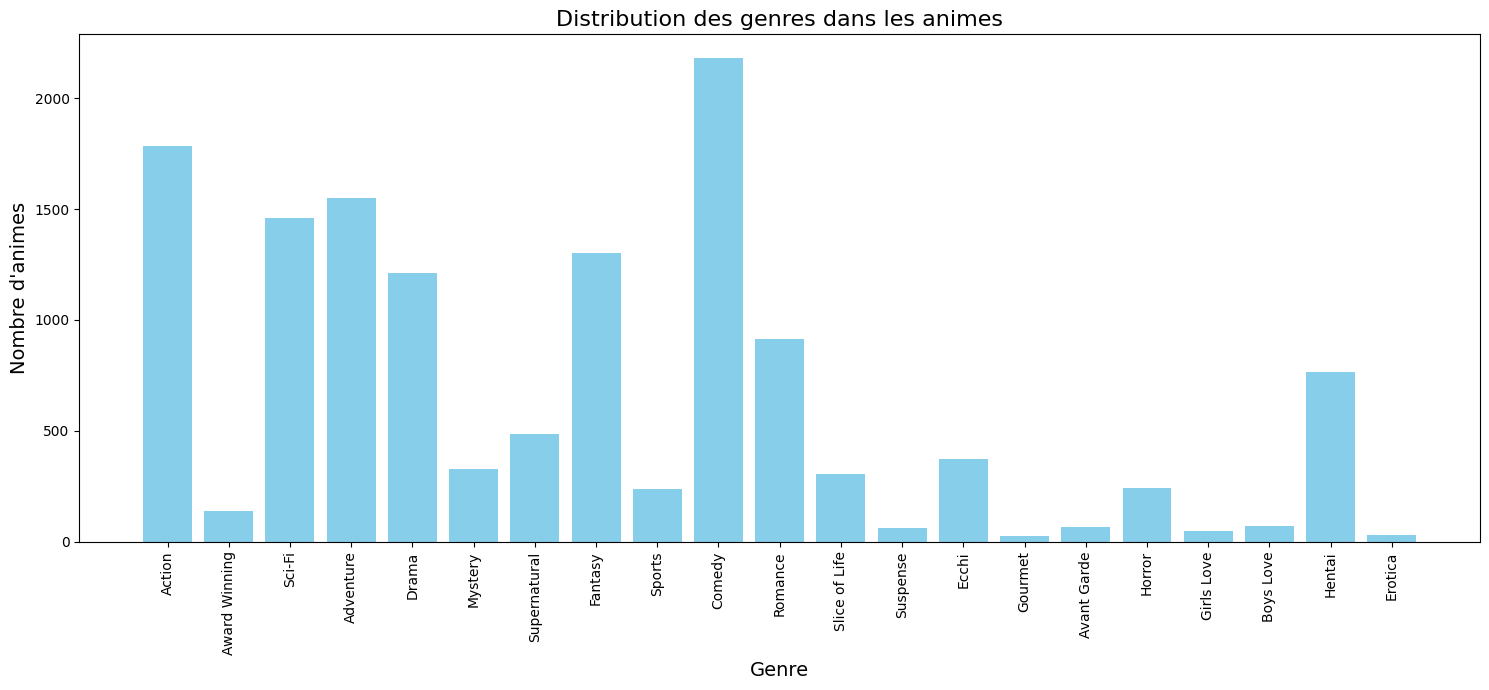

In [81]:
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter

# Compter la fréquence de chaque genre dans le dataset
genre_counts = Counter(chain.from_iterable(data['genre_list']))

# Préparer les données pour le graphique
genres, counts = zip(*genre_counts.items())

# Créer un graphique à barres pour la distribution des genres
plt.figure(figsize=(15, 7))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Nombre d\'animes', fontsize=14)
plt.title('Distribution des genres dans les animes', fontsize=16)
plt.xticks(rotation=90) # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout() # Ajuster la mise en page pour éviter le chevauchement des étiquettes
plt.show()


In [82]:
# Trier les données par popularité et sélectionner les 10 premiers
top10_popular = data.sort_values(by='popularity', ascending=True).head(10)

# Afficher le top 10 des animes les plus populaires
top10_popular[['title', 'popularity']]


,title,popularity
1393,Death Note,2
3961,Fullmetal Alchemist: Brotherhood,3
10,Naruto,8
5667,Steins;Gate,13
1574,Naruto: Shippuuden,15
11,One Piece,19
1431,Code Geass: Hangyaku no Lelouch,21
3554,Toradora!,23
4624,Angel Beats!,28
245,Bleach,38


In [83]:
# Trier les données par score et sélectionner les 10 premiers
# Nous excluons les entrées où le score est NaN avec dropna
top10_scores = data.dropna(subset=['score']).sort_values(by='score', ascending=False).head(10)

# Afficher le top 10 des animes avec les meilleurs scores
top10_scores[['title', 'score']]


,title,score
3961,Fullmetal Alchemist: Brotherhood,9.10
5667,Steins;Gate,9.07
5989,Gintama',9.04
741,Ginga Eiyuu Densetsu,9.02
833,Gintama,8.94
3527,Clannad: After Story,8.93
2647,Code Geass: Hangyaku no Lelouch R2,8.91
9,Monster,8.87
176,Sen to Chihiro no Kamikakushi,8.78
239,Hajime no Ippo,8.77


In [84]:
# Filtrer pour les films, c'est-à-dire les animes avec un seul épisode
films = data[data['episodes'] == 1]

# Trier les films par score et sélectionner les 10 premiers
top10_films = films.dropna(subset=['score']).sort_values(by='score', ascending=False).head(10)

# Afficher le top 10 des meilleurs films
top10_films[['title', 'score']]


,title,score
176,Sen to Chihiro no Kamikakushi,8.78
142,Mononoke Hime,8.67
404,Howl no Ugoku Shiro,8.66
4956,Suzumiya Haruhi no Shoushitsu,8.60
3271,Evangelion: 3.0+1.0 Thrice Upon a Time,8.60
3711,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,8.57
22,Neon Genesis Evangelion: The End of Evangelion,8.55
409,Perfect Blue,8.54
3568,Kara no Kyoukai Movie 5: Mujun Rasen,8.52
5008,Gintama Movie 1: Shinyaku Benizakura-hen,8.52
